<a href="https://colab.research.google.com/github/Mech1907/EPAT_WORKS_MJ/blob/main/yhilpisch_sessions_both_EPAT_06_01_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class HumanBeing(object):
  def __init__(self, first_name, eye_colour):
    self.first_name = first_name
    self.eye_colour = eye_colour
    self.position = 0
  def walk_steps(self, steps):
    self.position += steps


In [ ]:
junaid = HumanBeing("mohammed", "black")

In [ ]:
mj = HumanBeing("mohd", "gray")

In [ ]:
mj.first_name

'mohd'

In [ ]:
print(junaid.walk_steps(5))

None


In [ ]:
n = 5

In [ ]:
type(n)

int

In [ ]:
n.__sizeof__()

28

In [ ]:
import pandas as pd
import numpy as np

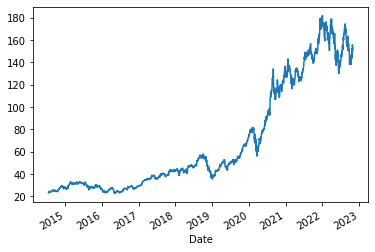

In [ ]:
url = 'http://certificate.tpq.io/mlfin.csv'  # EOD data
# url = 'http://hilpisch.com/aiif_eikon_id_data.csv'  # intraday data
#raw = pd.read_csv(url, index_col=0, parse_dates=True)# .dropna()
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
#del raw["BTC="]
del raw["BTC="]
#raw.dropna(inplace=True)
raw.dropna(inplace =True)
#rets = np.log(raw / raw.shift(1)).dropna()  # log returns
rets =  np.log(raw/raw.shift(1)).dropna()
rets2 = np.log(raw["AAPL.O"]/raw["AAPL.O"].shift(1)).dropna()
raw['AAPL.O'].plot()
#raw ["AAPL.O"].plot()

In [ ]:
raw
#rets
#rets2.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,.SPX,.VIX,SPY,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2014-07-17,23.272475,44.530,33.7000,17.6227,170.14,1958.12,14.54,195.7100,1.3526,1317.3000,26.9900,127.0899
2014-07-18,23.607500,44.690,33.7000,17.9330,171.47,1978.22,12.06,197.7099,1.3524,1310.5900,26.9399,126.1300
2014-07-21,23.484750,44.835,34.0600,17.9880,171.72,1973.63,12.81,197.3400,1.3523,1311.5900,26.9000,126.3400
2014-07-22,23.680000,44.830,34.7901,18.0420,175.02,1983.53,12.24,198.2000,1.3464,1307.0000,26.5900,125.7400
2014-07-23,24.297500,44.870,34.5000,17.9070,176.82,1987.01,11.52,198.6400,1.3464,1303.8400,26.4900,125.6200
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,149.350000,231.320,27.2100,115.6600,335.69,3830.60,27.28,382.0200,1.0077,1664.4884,25.1300,154.9800
2022-10-27,144.800000,226.750,26.2700,110.9600,337.18,3807.30,27.39,379.9800,0.9962,1662.9399,24.8200,154.7400
2022-10-28,155.740000,235.870,29.0700,103.4100,341.82,3901.06,25.75,389.0200,0.9963,1641.7600,24.7200,153.1600


In [ ]:
import time
import random

In [ ]:
sym = 'AAPL.O'

In [ ]:
for bar in range(10):
     print(bar, str(raw.index[bar])[:10], raw[sym].iloc[bar])
     time.sleep(random.random())
    #print(bar, str(raw.index[bar])[:10], raw[sym].iloc[bar])
    #time.sleep(random.random())

0 2014-07-17 23.272475
1 2014-07-18 23.6075
2 2014-07-21 23.48475
3 2014-07-22 23.68
4 2014-07-23 24.2975
5 2014-07-24 24.2575
6 2014-07-25 24.41775
7 2014-07-28 24.755
8 2014-07-29 24.595
9 2014-07-30 24.5375


In [ ]:
class FinancialData:
    url = 'https://certificate.tpq.io/mlfin.csv'
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    def retrieve_data(self):
        self.raw = pd.read_csv(self.url, index_col=0, parse_dates=True)
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(title=self.symbol)

In [ ]:
FinancialData("AAPL.O")

BacktestingBase Class
We are going to implement a base class for event-based backtesting with:

__init__
retrieve_data (FinancialData)
prepare_data (FinancialData)
plot_data (FinancialData)
get_date_price
print_balance
print_net_wealth
place_buy_order
place_sell_order
close_out

In [ ]:
class BacktestingBase(FinancialData):
    def __init__(self, symbol, amount):
        super().__init__(symbol)
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
    def get_date_price(self, bar):
        date = str(self.data.index[bar])[:10]
        price = self.data[self.symbol].iloc[bar]
        return date, price
    def print_balance(self, bar):
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance = {self.current_balance:.2f}')
    def print_net_wealth(self, bar):
        date, price = self.get_date_price(bar)
        net_wealth = self.current_balance + self.units * price
        print(f'{date} | net wealth = {net_wealth:.2f}')
    def place_buy_order(self, bar, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.current_balance -= units * price
        self.units += units
        self.trades += 1
        self.entry_price = price
        #print(f'{date} | bought {units} for {price}')
        print(f'{date} | bought {units} for {price}')
        self.print_balance(bar)
        self.print_net_wealth(bar)
    def place_sell_order(self, bar, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.current_balance += units * price
        self.units -= units
        self.trades += 1
        self.entry_price = price
        print(f'{date} | sold {units} for {price}')
        self.print_balance(bar)
        self.print_net_wealth(bar)
    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        print(55 * '=')
        print('*** CLOSING OUT POSITION ***')
        print(55 * '=')
        print(f'{date} | closing out {self.units} at {price}')
        self.current_balance += self.units * price
        self.units = 0
        self.trades += 1
        perf = (self.current_balance / self.initial_balance - 1) * 100
        self.print_balance(bar)
        self.print_net_wealth(bar)
        print(f'{date} | performance[%] = {perf:.3f}')
        print(f'{date} | trades[#] = {self.trades}')
        print(55 * '=')

In [ ]:
mj = BacktestingBase("AAPL.O", amount = 10000)
mj

In [ ]:
mj.place_sell_order(10,600)

2012-11-15 | sold 600 for 18.772124085
2012-11-15 | current balance = 208984.52
2012-11-15 | net wealth = 10000.00


In [ ]:
class SMABacktester(BacktestingBase):
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    def backtest_strategy(self, SMA1, SMA2, sl=None, wait=5):
        self.units = 0
        self.trades = 0
        self.position = 0
        self.wait = 0
        self.current_balance = self.initial_balance
        self.net_wealths = list()
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        print(55 * '=')
        print('*** STARTING BACKTEST ***')
        print(f'SYMBOL = {self.symbol} | SMA1 = {self.SMA1} | SMA2 = {self.SMA2}')
        print(55 * '=')
        for bar in range(self.SMA2, len(self.data)):
            if self.wait != 0:
                self.wait -= 1
            date, price = self.get_date_price(bar)
            self.net_wealths.append(self.current_balance + self.units * price)
            signal = 1 if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar] else -1
            if sl is not None and self.position != 0 and self.wait == 0:
                # checking for stop loss
                rc = (price - self.entry_price) / self.entry_price
                if self.position == 1 and rc < -sl:
                    print(f'{date} | STOP LOSS HIT | LONG {rc:.3f}')
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0
                    self.wait = wait
                    print(55 * '-')
                    elif self.position == -1 and rc > sl:
                    print(f'{date} | STOP LOSS HIT | SHORT {rc:.3f}')
                    self.place_buy_order(bar, units=-self.units)
                    self.position = 0
                    self.wait = wait
                    print(55 * '-')
            if self.position in [0, -1] and signal == 1 and self.wait == 0:
                # going long
                self.place_buy_order(bar, units=(1 - self.position) * 5000)  # adjust to the instrument
                self.position = 1
                print(55 * '-')
            elif self.position in [0, 1] and signal == -1 and self.wait == 0:
                # goint short
                self.place_sell_order(bar, units=(1 + self.position) * 5000)  # adjust to the instrument
                self.position = -1
                print(55 * '-')
        self.close_out(bar)